<a href="https://colab.research.google.com/github/MALFAYEZ/malf64061/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### import libraries

import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers

In [2]:
### importing the dataset

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


17473536/17464789 [==============================] - 0s 0us/step


In [3]:
train_labels[0]

1

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
###   Model Structure 

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [12]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5510 - accuracy: 0.7753 - val_loss: 0.4002 - val_accuracy: 0.8546
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2984 - accuracy: 0.9001 - val_loss: 0.2982 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2002 - accuracy: 0.9335 - val_loss: 0.2857 - val_accuracy: 0.8869
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1506 - accuracy: 0.9523 - val_loss: 0.2813 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1139 - accuracy: 0.9688 - val_loss: 0.2958 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0886 - accuracy: 0.9785 - val_loss: 0.3152 - val_accuracy: 0.8809
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0680 - accuracy: 0.9865 - val_loss: 0.3395 - val_accuracy: 0.8794
Epoch 8/20
30

### Plotting the training and validation loss

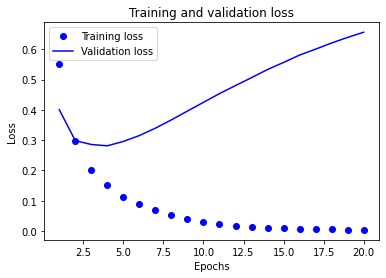

In [15]:


history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [17]:
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [19]:
model1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model1_1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [20]:
history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history1_1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 100ms/step - loss: 0.5748 - accuracy: 0.7617 - val_loss: 0.4134 - val_accuracy: 0.8640
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2960 - accuracy: 0.9017 - val_loss: 0.2885 - val_accuracy: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1858 - accuracy: 0.9367 - val_loss: 0.2777 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1289 - accuracy: 0.9593 - val_loss: 0.3004 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0907 - accuracy: 0.9740 - val_loss: 0.3357 - val_accuracy: 0.8792
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0632 - accuracy: 0.9853 - val_loss: 0.3705 - val_accuracy: 0.8794
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0418 - accuracy: 0.9923 - val_loss: 0.4178 - val_accuracy: 0.8746
Epoch 8/20
3

Ploting

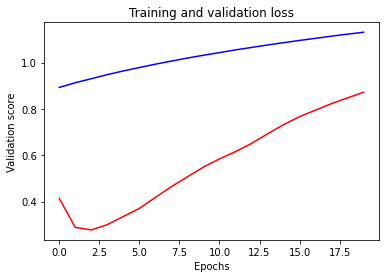

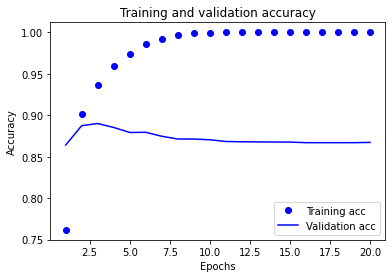

In [21]:
historyp1 = history1.history
historyp1_1 = history1_1.history

plt.plot(history1.history['val_loss'], 'r', history1_1.history['val_loss'], 'b')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

plt.clf()
acc = historyp1["accuracy"]
val_acc = historyp1["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.


In [22]:
model2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [23]:
model2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [24]:
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5088 - accuracy: 0.7921 - val_loss: 0.3209 - val_accuracy: 0.8767
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2278 - accuracy: 0.9157 - val_loss: 0.2953 - val_accuracy: 0.8810
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1464 - accuracy: 0.9489 - val_loss: 0.2979 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0968 - accuracy: 0.9717 - val_loss: 0.3361 - val_accuracy: 0.8803
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0661 - accuracy: 0.9848 - val_loss: 0.3736 - val_accuracy: 0.8775
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0423 - accuracy: 0.9921 - val_loss: 0.4180 - val_accuracy: 0.8754
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0254 - accuracy: 0.9973 - val_loss: 0.4644 - val_accuracy: 0.8735
Epoch 8/20
30

Ploting

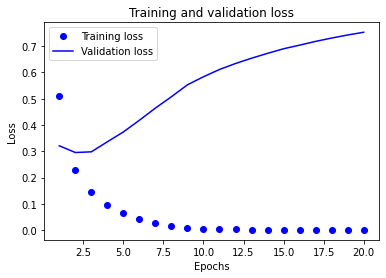

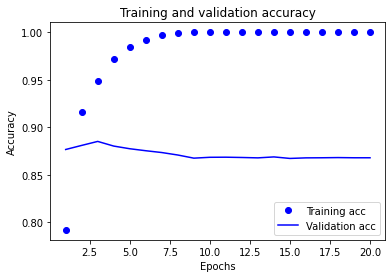

In [25]:
historyp2 = history2.history
loss_values = historyp2["loss"]
val_loss_values = historyp2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = historyp2["accuracy"]
val_acc = historyp2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Try using the mse loss function instead of binary_crossentropy.

In [26]:
model3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [27]:
model3.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

In [28]:
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.1722 - accuracy: 0.7905 - val_loss: 0.1131 - val_accuracy: 0.8679
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0798 - accuracy: 0.9106 - val_loss: 0.0879 - val_accuracy: 0.8858
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0531 - accuracy: 0.9442 - val_loss: 0.0835 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0388 - accuracy: 0.9617 - val_loss: 0.0841 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0294 - accuracy: 0.9739 - val_loss: 0.0860 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0220 - accuracy: 0.9827 - val_loss: 0.0880 - val_accuracy: 0.8798
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0170 - accuracy: 0.9875 - val_loss: 0.0905 - val_accuracy: 0.8789
Epoch 8/20
30

Ploting

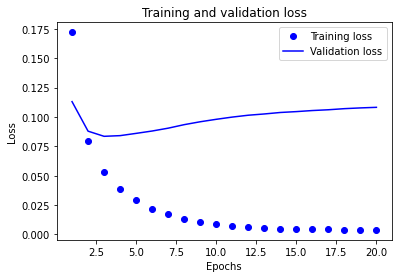

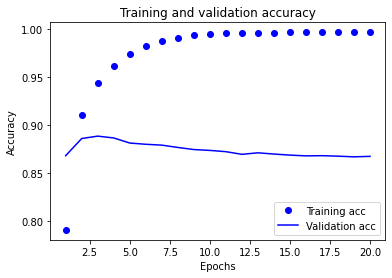

In [29]:
historyp3 = history3.history
loss_values = historyp3["loss"]
val_loss_values = historyp3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



plt.clf()
acc = historyp3["accuracy"]
val_acc = historyp3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.


In [30]:
model4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [32]:
model4.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

In [33]:
history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.1736 - accuracy: 0.7837 - val_loss: 0.1167 - val_accuracy: 0.8640
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0823 - accuracy: 0.9082 - val_loss: 0.0888 - val_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0542 - accuracy: 0.9421 - val_loss: 0.0833 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0388 - accuracy: 0.9619 - val_loss: 0.0850 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0284 - accuracy: 0.9749 - val_loss: 0.0860 - val_accuracy: 0.8841
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0213 - accuracy: 0.9837 - val_loss: 0.0888 - val_accuracy: 0.8790
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0164 - accuracy: 0.9879 - val_loss: 0.0920 - val_accuracy: 0.8754
Epoch 8/20
30

Ploting

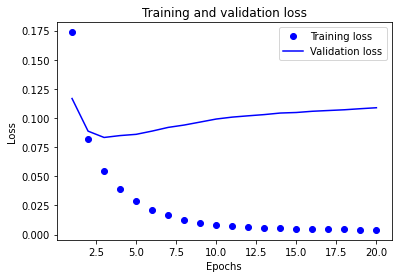

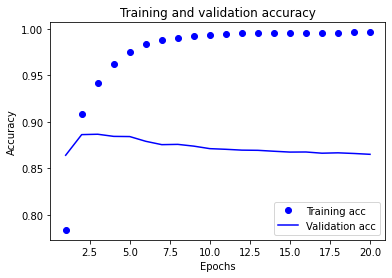

In [34]:
historyp4 = history4.history
loss_values = historyp4["loss"]
val_loss_values = historyp4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc = historyp4["accuracy"]
val_acc = historyp4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()